# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib  as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

# Exploring Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.shape

(9994, 13)

In [8]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [10]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [11]:
# To get unique businesss category
print(f"Business Segments={df['Segment'].unique()} \n")
print(f"Business Categorys={df['Category'].unique()} \n")
print(f"Business Sub-Category={df['Sub-Category'].unique()}")

Business Segments=['Consumer' 'Corporate' 'Home Office'] 

Business Categorys=['Furniture' 'Office Supplies' 'Technology'] 

Business Sub-Category=['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


# Relation Analysis 

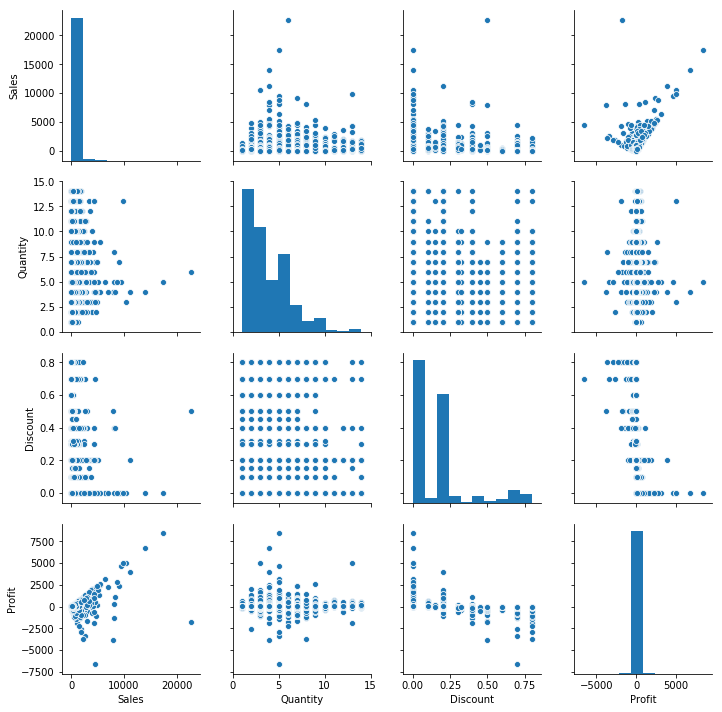

In [12]:
sns.pairplot(df.loc[:,['Sales','Quantity','Discount','Profit']])

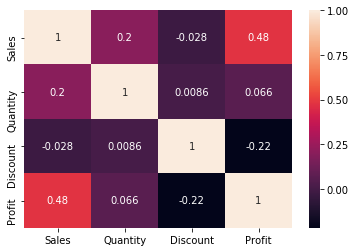

In [13]:
#plotting heat map
correlation=df.loc[:,['Sales','Quantity','Discount','Profit']].corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

Here we can see that Profit and Sales are most positively correlated and Profit and Discount are most negatively correlated.

# Exploring Further

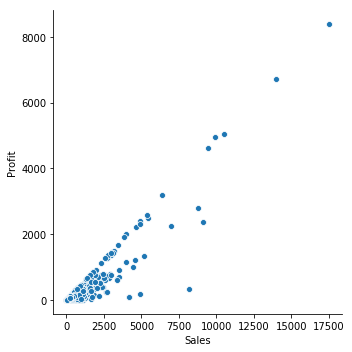

In [14]:
discountZero=df[df['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=discountZero)

It is seen that when Discount is 0 then Sales increases with Profit

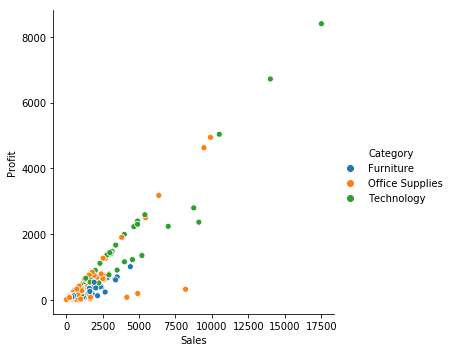

In [15]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=discountZero)

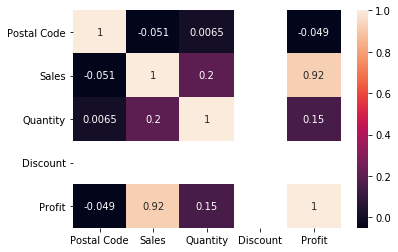

In [16]:
correlation=discountZero.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

So, it is evident that Profit and Sales are positively correlated when Discount is 0

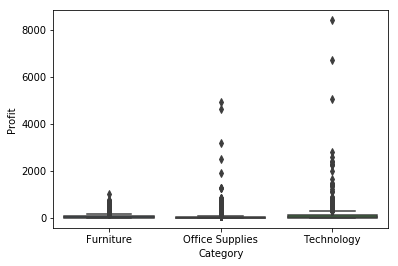

In [17]:
sns.boxplot(x='Category',y='Profit',data=discountZero)

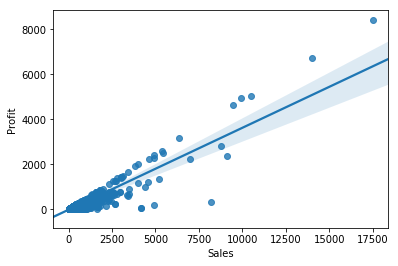

In [18]:
sns.regplot(discountZero['Sales'],discountZero['Profit'])

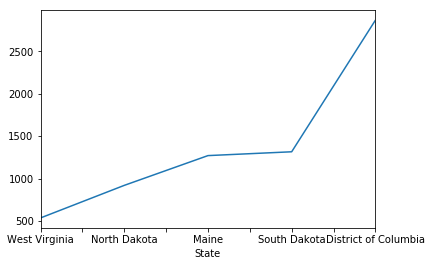

In [19]:
data=discountZero.groupby('State').apply(lambda data,x:sum(data[x]),'Sales')
data=data.sort_values(ascending=True)[:5]
data.plot(kind='line')

West Virginia has the lowest Sales among States

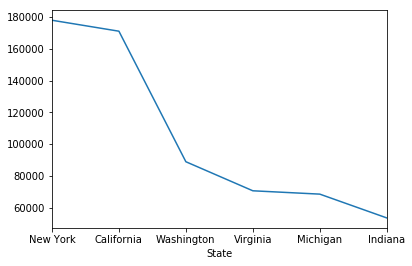

In [20]:
data=discountZero.groupby('State').apply(lambda data,x:sum(data[x]),'Sales')
data=data.sort_values(ascending=False)[:6]
data.plot(kind='line')

New York has highest Sales among States

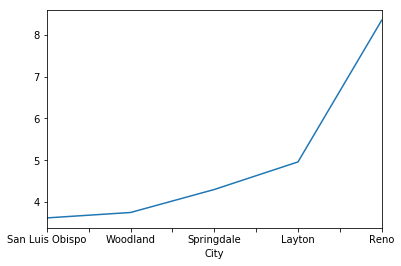

In [21]:
data=discountZero.groupby('City').apply(lambda data,x:sum(data[x]),'Sales')
data=data.sort_values(ascending=True)[:5]
data.plot(kind='line')

San Luis Obispo has lowest Sales among cities

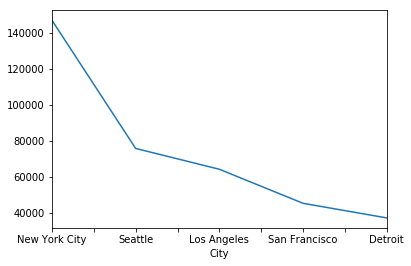

In [22]:
data=discountZero.groupby('City').apply(lambda data,x:sum(data[x]),'Sales')
data=data.sort_values(ascending=False)[:5]
data.plot(kind='line')

New York City has highest Sales among Cities

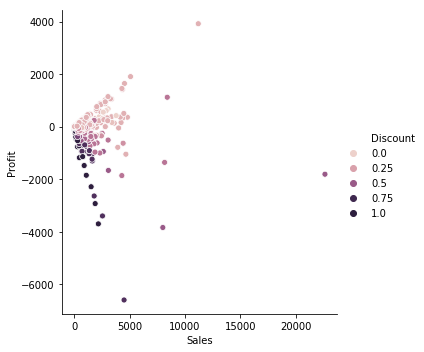

In [23]:
discountNotZ=df[df['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=discountNotZ)

It is seen that as discount increases, sales increases too but profit decreases.

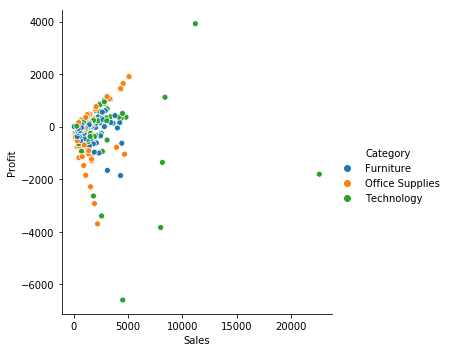

In [24]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=discountNotZ)

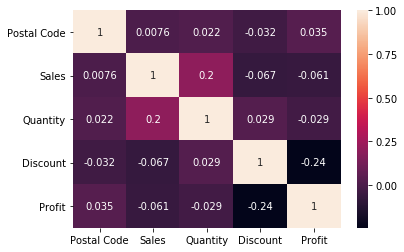

In [25]:
correlation=discountNotZ.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

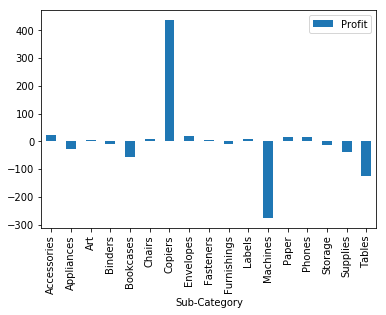

In [26]:
pivot=pd.pivot_table(discountNotZ,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

Copiers have highest profit and Machines have least. 

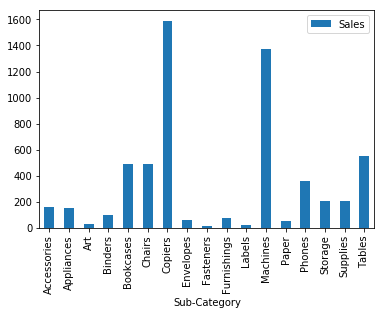

In [27]:
pivot=pd.pivot_table(discountNotZ,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

Here we see that copiers has highest sale and Machines has second highest sales
Therefore,'Machines' has second highest sale but due to large discount it is in loss and sales in 'Fasteners','labels'and 'Art' category are low.

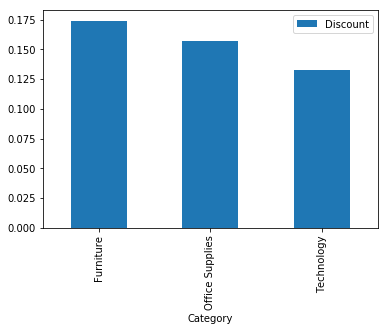

In [28]:
pivot=pd.pivot_table(df,index='Category',values='Discount')
pivot.plot(kind='bar')

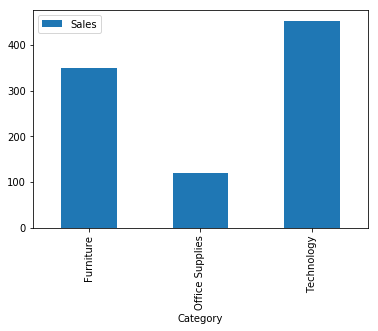

In [29]:
pivot=pd.pivot_table(df,index='Category',values='Sales')
pivot.plot(kind='bar')

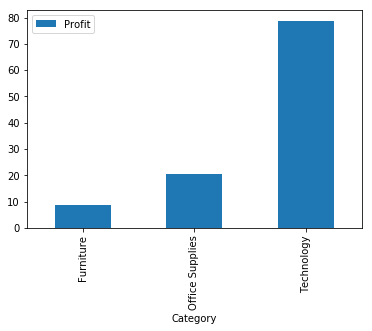

In [30]:
pivot=pd.pivot_table(df,index='Category',values='Profit')
pivot.plot(kind='bar')

1)More Discount is given in Furniture and less Discount is given in Technology.

2)Sales of Technology is more as compared to Furniture.

3)Profit of Technology are more as compared to Furniture.

# Result 

As discount is increased, sales increaes but profit decreases. Sales in West Virginia and San Luis Obispo is low so that needs some attention to increase the business. Also machines have a huge sale but it is in loss because of huge discount, so the discount must be decreased so that we can get a suitable profit out of it. Sales in Fasteners, labels and  Art is too low.